In [1]:
import pandas as pd
import os
from matplotlib import pyplot as plt
import seaborn as sns
import matplotlib.ticker as mtick
import numpy as np

In [2]:
excel_path = '/Users/Alina/Desktop/UNI Medizin/Doktorarbeit/Python/nature/'

##### The excel sheet can be downloaded under "source data extended Fig. 5" down below: 
##### https://www.nature.com/articles/s41586-021-03570-8#Sec20

this sheet contains only significantly upregulated genes tested in a single cell differential analysis model

In [3]:
de_stats = pd.read_excel(os.path.join(excel_path,'41586_2021_3570_MOESM21_ESM.xlsx'), index_col=False, 
                         sheet_name='EDFig5c')

In [4]:
#this replicates the plot from Delorey et al. (2021), extended Fig. 5c

def make_de_counts_plot(all_de):
    fig = plt.figure(figsize=[14,8])
    order = all_de.cell_type.value_counts().index

    ax1 = sns.stripplot(data=all_de, 
              y='disease_log2fc', 
              x='cell_type', 
              order=order, 
              jitter=.44, 
              size=4,
              alpha=.8,
              palette = "tab20"
              )
    plt.xticks(rotation=45, horizontalalignment="right");#rotation_mode="anchor");
    
    ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
    
    num_de_genes = all_de.groupby('cell_type').size().sort_values(ascending=False)
    ax2.hlines(num_de_genes, np.arange(len(order))-.4, np.arange(len(order))+.4, colors='k', linewidth=2)
    ax2.set_ylabel('Number of signficant diferentially expressed genes', color='k')  # we already handled the x-label with ax1
    
    for i,num in enumerate(num_de_genes):
        ax2.text(s=str(num), x=i, y=num+15, ha='center', fontsize='large', fontweight='bold')

/var/folders/dt/qnd0qllj29971fztpkf_20bc0000gn/T/ipykernel_18640/2215650749.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax1 = sns.stripplot(data=all_de,


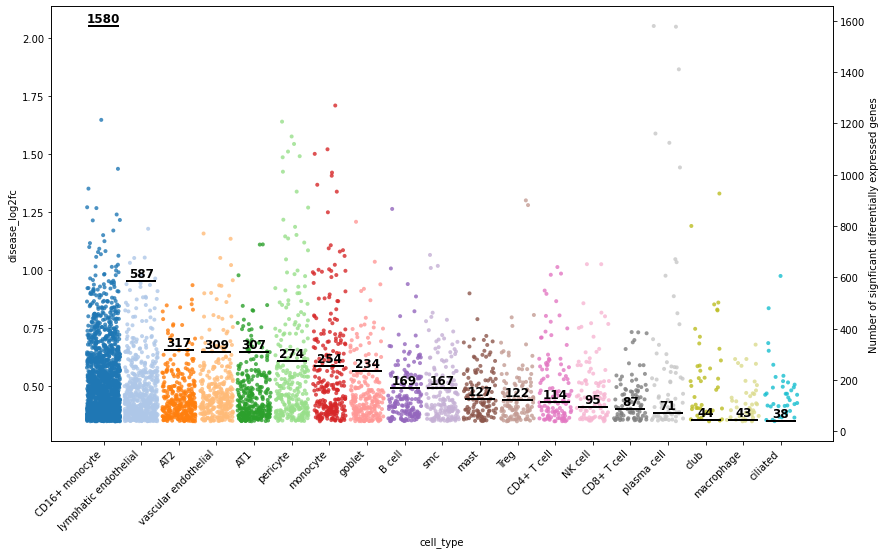

In [5]:
make_de_counts_plot(de_stats)

### here i show the top 10 upregulated genes per cluster

In [6]:
top_genes_by_cell_type = {}

#iterate over unique cell types
for cell_type in de_stats['cell_type'].unique():
    #filter DataFrame for current cell type
    df_cell_type = de_stats[de_stats['cell_type'] == cell_type]
    #sort by 'disease_log2fc' in descending order
    df_cell_type_sorted = df_cell_type.sort_values(by='disease_log2fc', ascending=False)
    #get the top 10 genes
    top_genes = df_cell_type_sorted.iloc[:10, 0].tolist()  #assuming the gene column is the first column
    #store top genes for current cell type
    top_genes_by_cell_type[cell_type] = top_genes

#print the top 10 genes for each cell type
for cell_type, top_genes in top_genes_by_cell_type.items():
    print(f"Top 10 genes for {cell_type}: {top_genes}")

Top 10 genes for CD4+ T cell: ['MX1', 'LY6E', 'KLF2', 'IRF7', 'IFI44L', 'IL7R', 'XAF1', 'TAOK1', 'YWHAZ', 'TRIM22']
Top 10 genes for AT2: ['KRT7', 'CEACAM6', 'RAB27B', 'HNRNPU', 'PARP14', 'LMO3', 'PLS3', 'VPS13C', 'STAT1', 'YWHAZ']
Top 10 genes for club: ['TAOK1', 'IFI6', 'S100A2', 'HLA-B', 'SH3BGRL3', 'ANXA1', 'HLA-A', 'HLA-C', 'KRT19', 'WFDC2']
Top 10 genes for CD8+ T cell: ['TAOK1', 'DDX17', 'MBNL1', 'NEAT1', 'HNRNPU', 'PTPRC', 'MX1', 'XAF1', 'CD2', 'JUND']
Top 10 genes for Treg: ['MT-ND4L', 'MTRNR2L12', 'MT-ATP8', 'MBNL1', 'ETS1', 'YWHAZ', 'PTPRC', 'HNRNPU', 'CCL5', 'MACF1']
Top 10 genes for CD16+ monocyte: ['LCP1', 'JUND', 'CCDC88A', 'KLF2', 'METRNL', 'CTSZ', 'TACC1', 'MBD2', 'PHIP', 'HMOX1']
Top 10 genes for smc: ['COL3A1', 'CD81', 'GNAS', 'COL1A2', 'COL6A3', 'MARCKS', 'PPDPF', 'MMP2', 'ZEB2', 'TPM4']
Top 10 genes for monocyte: ['CCL2', 'MX1', 'IFIT3', 'CTSL', 'IFIT2', 'GBP1', 'ISG15', 'IL1RN', 'IFI6', 'PARP14']
Top 10 genes for AT1: ['F3', 'SLC34A2', 'MUC1', 'SFTPB', 'VMP1', 'NE

In [7]:
#checking our genes of interest

genes_of_interest = ['VEGFA', 'VEGFB', 'VEGFC', 'FTR1', 'KTR', 'FLT4', 'TGFB1', 'TGFBI', 'TGFB2', 
                     'TGFB3','NRP1', 'NRP2', 'TGFBR1', 
                     'TGFBR2','TGFBR3', 'ACE2', 'TMPRSS2']
filtered_df = de_stats[de_stats.iloc[:, 0].isin(genes_of_interest)]
print(filtered_df)

     Unnamed: 0  disease_log2fc              cell_type   sig
409       VEGFA        0.458391                    AT2  True
2062      TGFB1        0.612143         CD16+ monocyte  True
2063      TGFBI        0.612714         CD16+ monocyte  True
2422      VEGFA        0.566202                    smc  True
2658      TGFB1        0.485435               monocyte  True
2659      TGFBI        0.494076               monocyte  True
2970      VEGFA        0.546571                    AT1  True
3325      VEGFA        0.458032                 goblet  True
3514       FLT4        0.637806  lymphatic endothelial  True
3843     TGFBR2        0.712323  lymphatic endothelial  True
3844     TGFBR3        0.438532  lymphatic endothelial  True
4363       NRP1        0.581341   vascular endothelial  True
4464     TGFBR2        0.584709   vascular endothelial  True
4589      TGFB1        0.514695                NK cell  True


In [16]:
de = pd.read_excel(os.path.join(excel_path, '41586_2021_3570_MOESM6_ESM.xlsx'), 
                       index_col=-1, sheet_name='sc_sn_pseudobulk_DE')

#this has data from a single cell differential analysis and a pseudobulk differential analysis model

In [19]:
#only use single cell differential expression data

sc = de[de['method'] == "single_cell"]

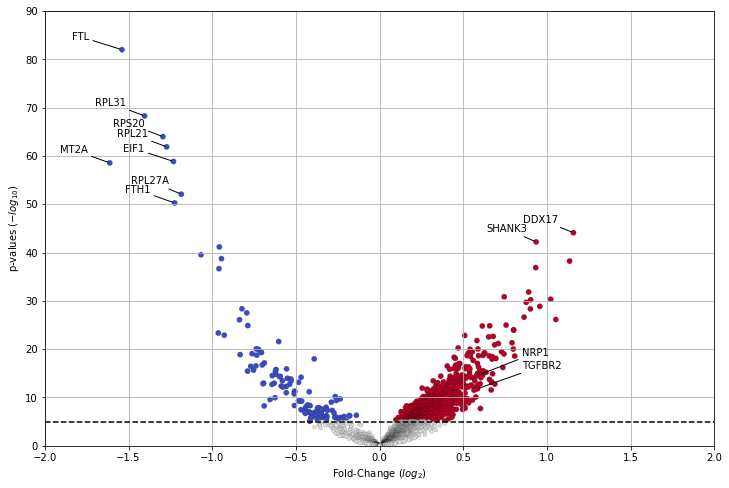

In [48]:
scsubset = sc[sc['celltype'] == 'vascular endothelial']
scsubset = scsubset.sort_values(by='neg_log_pval', ascending=False)
scsubset.reset_index(drop=True, inplace=True)
top_indices = scsubset.index[:10]

def plot_de(scsubset_df):
    fig = plt.figure(figsize=(12,8))
    ax = plt.gca()
    ax.scatter(x=scsubset_df.disease_log2fc, 
               y=scsubset_df.neg_log_pval, 
               c=scsubset_df['sig']*np.sign(scsubset_df.disease_log2fc), 
               s=scsubset_df['sig']*15+15,
               edgecolors='k',
               linewidth=.1,
               cmap='coolwarm')
    ax.set_xlabel('Fold-Change ($log_{2}$)')
    plt.ylabel('p-values ($-log_{10}$)')
    plt.grid(True)
    ax.set_xlim(-2, 2)
    ax.set_ylim(0,90)
    y_value = 5
    ax.axhline(y=y_value, color='k', linestyle='--')
    for index in top_indices:
        gene_name = scsubset.iloc[index, 0]
        ax.annotate(gene_name, 
                    xy=(scsubset.iloc[index]['disease_log2fc'], scsubset.iloc[index]['neg_log_pval']),
                    xytext=(-50, 10),
                    textcoords='offset points',
                    arrowprops=dict(arrowstyle='-'))

    genes_to_annotate = ['NRP1', 'TGFBR2']
    for gene in genes_to_annotate:
        gene_row = scsubset_df[scsubset_df.iloc[:, 0] == gene]
        if not gene_row.empty:
            ax.annotate(gene, 
                        xy=(gene_row['disease_log2fc'].values[0], gene_row['neg_log_pval'].values[0]),
                        xytext=(45, 20),
                        textcoords='offset points',
                        arrowprops=dict(arrowstyle='-'))
    return fig

fig = plot_de(scsubset)
fig.savefig('scplot.png', dpi=600)

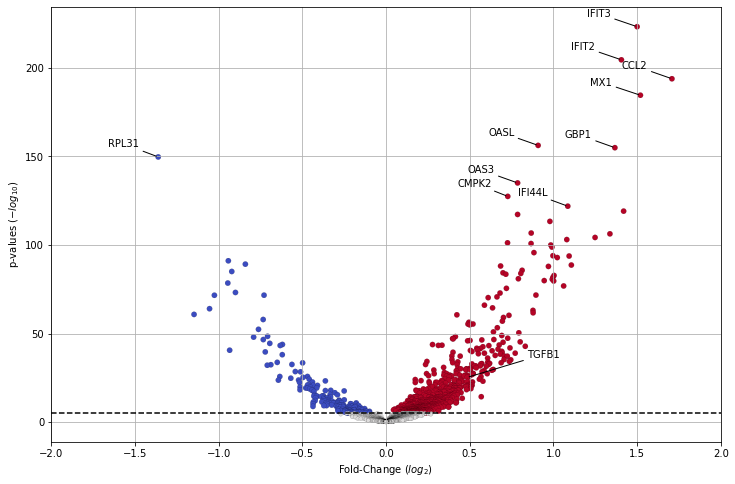

In [44]:
scsubset2 = sc[sc['celltype'] == 'monocyte']
scsubset2 = scsubset2.sort_values(by='neg_log_pval', ascending=False)
scsubset2.reset_index(drop=True, inplace=True)
top_indices = scsubset2.index[:10]

def plot_de(scsubset2_df):
    fig = plt.figure(figsize=(12,8))
    ax = plt.gca()
    ax.scatter(x=scsubset2_df.disease_log2fc, 
               y=scsubset2_df.neg_log_pval, 
               c=scsubset2_df['sig']*np.sign(scsubset2_df.disease_log2fc), 
               s=scsubset2_df['sig']*15+15,
               edgecolors='k',
               linewidth=.1,
               cmap='coolwarm')
    ax.set_xlabel('Fold-Change ($log_{2}$)')
    plt.ylabel('p-values ($-log_{10}$)')
    plt.grid(True)
    ax.set_xlim(-2, 2)
    #ax.set_ylim(0,90)
    y_value = 5
    ax.axhline(y=y_value, color='k', linestyle='--')
    for index in top_indices:
        gene_name = scsubset2.iloc[index, 0]
        ax.annotate(gene_name, 
                    xy=(scsubset2.iloc[index]['disease_log2fc'], scsubset2.iloc[index]['neg_log_pval']),
                    xytext=(-50, 10),
                    textcoords='offset points',
                    arrowprops=dict(arrowstyle='-'))
    genes_to_annotate = ['TGFB1']
    for gene in genes_to_annotate:
        gene_row = scsubset2_df[scsubset2_df.iloc[:, 0] == gene]
        if not gene_row.empty:
            ax.annotate(gene, 
                        xy=(gene_row['disease_log2fc'].values[0], gene_row['neg_log_pval'].values[0]),
                        xytext=(60, 20),  
                        textcoords='offset points',
                        arrowprops=dict(arrowstyle='-'))
    return fig

fig2 = plot_de(scsubset2)
fig2.savefig('scplot2.png', dpi=600)